In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

rfm = pd.read_csv("../data/processed/customer_rfm.csv")
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [2]:
rfm_features = rfm[['Recency',"Frequency","Monetary"]]

In [3]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

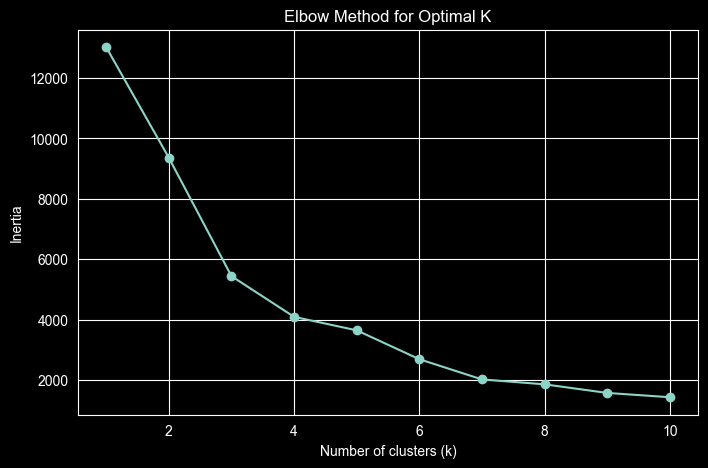

In [4]:
#Elbow method or USing the K value

inertia= []
for k in range(1,11):
     km = KMeans(n_clusters=k, random_state=42)
     km.fit(rfm_scaled)
     inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11),inertia,marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [5]:
kmeans = KMeans(n_clusters=4,random_state=42)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)


In [6]:
rfm['cluster'].value_counts()

cluster
3    3053
1    1062
0     211
2      13
Name: count, dtype: int64

In [7]:
cluster_profile = rfm.groupby("cluster").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "Monetary": "mean",
    "CustomerID": "count"
}).rename(columns={'CustomerID' : "CustomerCount"})

cluster_profile

,Recency,Frequency,Monetary,CustomerCount
cluster,,,,
0,15.672986,22.047393,12453.225924,211
1,248.564030,1.551789,478.107581,1062
2,7.384615,82.692308,127338.313846,13
3,43.910580,3.655748,1349.698298,3053


In [8]:
print("Rows in customer_segments:", rfm.shape[0])
print("Unique customers:", rfm["CustomerID"].nunique())


Rows in customer_segments: 4339
Unique customers: 4339


In [12]:
rfm.to_csv("../data/processed/customer_segments.csv")

In [14]:
import joblib
joblib.dump(scaler, "../models/rfm_scaler.pkl")
joblib.dump(kmeans, "../models/kmeans_model.pkl")

['../models/kmeans_model.pkl']